In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import json
from datasets import load_dataset


dataset = load_dataset("gsm8k", "main")
train_questions = np.array(dataset["train"]["question"])
train_answers = np.array(dataset["train"]['answer'])

test_questions = np.array(dataset["test"]["question"])
test_answers = np.array(dataset["test"]['answer'])


/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [40]:
num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []
num_correct_gpt4o_all = []

ckpts = ["58", "116", "175", "233", "292", "348"]
train_name = "gsm8k_orig_6epochs_full_lr0.0002_bs128"



for ckpt in ckpts:
    train_correct = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_answer_types50_seed2.npy")==0)
    train_samples = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_answers50_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_questions)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(50):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[input_idx].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all.append(num_memorized_ckpt)
    num_correct_different_all.append(num_correct_different_ckpt)
    num_incorrect_all.append(num_incorrect_ckpt)
    
    
    train_correct_gpt4o = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_gpt4o_answer_types50_seed2.npy")==0).sum(axis=-1)
    num_correct_gpt4o_all.append(train_correct_gpt4o)
    
num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)
num_correct_gpt4o_all = np.array(num_correct_gpt4o_all)

In [3]:
test_accs_all1 = []
pass5_all1 = []
ckpts = ["58", "116", "175", "233", "292", "348"]
train_name = "gsm8k_orig_6epochs_full_lr0.0002_bs128"

for ckpt in ckpts:
    test_accs = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/test_answer_types50_seed2.npy")==0)
    pass5_all1.append(test_accs.max(axis=-1).mean())
    test_accs_all1.append(test_accs.mean())

test_accs_all1 = np.array(test_accs_all1)
pass5_all1 = np.array(pass5_all1)
print(test_accs_all1)
print(pass5_all1)

[0.10062168 0.13529947 0.17905989 0.21156937 0.21789234 0.24277483]
[0.59211524 0.6368461  0.6929492  0.69370735 0.68309325 0.69219105]


In [23]:
num_memorized_all2 = []
num_correct_different_all2 = []
num_incorrect_all2 = []
num_correct_gpt4o_all2 = []

ckpts = ["58", "116", "175", "233", "292", "348"]
train_name = "gsm8k_orig_6epochs_full_lr2e-05_bs128"



for ckpt in ckpts:
    train_correct = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_answer_types50_seed2.npy")==0)
    train_samples = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_answers50_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_questions)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(50):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[input_idx].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all2.append(num_memorized_ckpt)
    num_correct_different_all2.append(num_correct_different_ckpt)
    num_incorrect_all2.append(num_incorrect_ckpt)
    
    train_correct_gpt4o = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_gpt4o_answer_types50_seed2.npy")==0).sum(axis=-1)
    num_correct_gpt4o_all2.append(train_correct_gpt4o)
    
num_memorized_all2 = np.array(num_memorized_all2)
num_correct_different_all2 = np.array(num_correct_different_all2)
num_incorrect_all2 = np.array(num_incorrect_all2)
num_correct_gpt4o_all2 = np.array(num_correct_gpt4o_all2)

In [11]:
test_accs_all2 = []
pass5_all2 = []
ckpts = ["58", "116", "175", "233", "292", "348"]
train_name = "gsm8k_orig_6epochs_full_lr2e-05_bs128"

for ckpt in ckpts:
    test_accs = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/test_answer_types50_seed2.npy")==0)
    pass5_all2.append(test_accs.max(axis=-1).mean())
    test_accs_all2.append(test_accs.mean())

test_accs_all2 = np.array(test_accs_all2)
pass5_all2 = np.array(pass5_all2)
print(test_accs_all2)
print(pass5_all2)

[0.41980288 0.47384382 0.50999242 0.51308567 0.53094769 0.53907506]
[0.91205459 0.91963609 0.91129644 0.92115239 0.91357089 0.91205459]


In [24]:
num_memorized_all3 = []
num_correct_different_all3 = []
num_incorrect_all3 = []
num_correct_gpt4o_all3 = []

ckpts = ["58", "116", "175", "233", "292", "348"]
train_name = "gsm8k_orig_6epochs_full_lr5e-07_bs128"



for ckpt in ckpts:
    train_correct = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_answer_types50_seed2.npy")==0)
    train_samples = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_answers50_seed2.npy"))

    num_memorized_ckpt = []
    num_correct_different_ckpt = []
    num_incorrect_ckpt = []

    for input_idx in range(len(train_questions)):
        num_memorized = 0
        num_correct_different = 0
        num_incorrect = 0
        for sample_idx in range(50):
            correct = train_correct[input_idx, sample_idx]
            if correct:
                if train_samples[input_idx][sample_idx].strip() == train_answers[input_idx].strip():
                    num_memorized+=1
                else:
                    num_correct_different+=1
            else:
                num_incorrect+=1 
        num_memorized_ckpt.append(num_memorized)
        num_correct_different_ckpt.append(num_correct_different)
        num_incorrect_ckpt.append(num_incorrect)
    
    num_memorized_all3.append(num_memorized_ckpt)
    num_correct_different_all3.append(num_correct_different_ckpt)
    num_incorrect_all3.append(num_incorrect_ckpt)
    
    
    train_correct_gpt4o = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/train_gpt4o_answer_types50_seed2.npy")==0).sum(axis=-1)
    num_correct_gpt4o_all3.append(train_correct_gpt4o)
    
num_memorized_all3 = np.array(num_memorized_all3)
num_correct_different_all3 = np.array(num_correct_different_all3)
num_incorrect_all3 = np.array(num_incorrect_all3)
num_correct_gpt4o_all3 = np.array(num_correct_gpt4o_all3)

In [18]:
test_accs_all3 = []
pass5_all3 = []
ckpts = ["58", "116", "175", "233", "292", "348"]
train_name = "gsm8k_orig_6epochs_full_lr5e-07_bs128"

for ckpt in ckpts:
    test_accs = (np.load("ckpts/"+train_name+"/checkpoint-"+ckpt+ "/test_answer_types50_seed2.npy")==0)
    pass5_all3.append(test_accs.max(axis=-1).mean())
    test_accs_all3.append(test_accs.mean())

test_accs_all3 = np.array(test_accs_all3)
pass5_all3 = np.array(pass5_all3)
print(test_accs_all3)
print(pass5_all3)

[0.27519333 0.42269901 0.48144049 0.49854435 0.51646702 0.51611827]
[0.88551933 0.93252464 0.94238059 0.94768764 0.94768764 0.94996209]


In [45]:
num_correct_different_all

array([[46,  0,  0, ...,  1,  2,  0],
       [41,  4,  2, ...,  9,  4,  0],
       [50,  1, 32, ...,  4,  0,  3],
       [50,  0, 33, ...,  4,  3, 18],
       [42, 37,  0, ...,  9,  0, 23],
       [ 0,  0,  0, ..., 17,  0,  0]])

In [41]:
num_correct_different_all1[:3].max(axis=0).mean()

NameError: name 'num_correct_different_all1' is not defined

In [46]:
[num_correct_different_all[:i].max(axis=0).mean() for i in range(1, 8)]

[6.231366251839957,
 12.969088719389804,
 21.68272447477586,
 27.28301886792453,
 29.405058209554397,
 29.94513582229359,
 29.94513582229359]

In [48]:
num_correct_different_all.shape

(6, 7473)

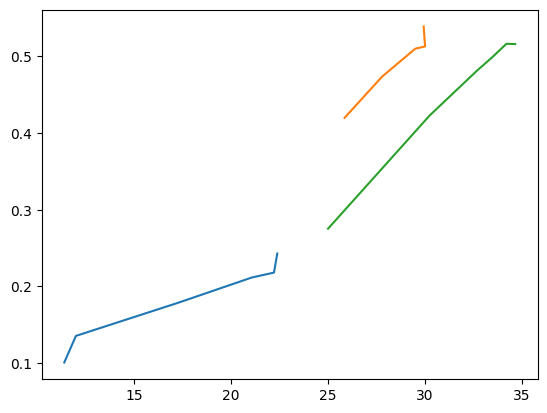

In [68]:
constant = 2

plt.plot(np.array([num_correct_different_all[:i].max(axis=0).mean() for i in range(1, 7)])-constant*np.log(num_memorized_all.mean(axis=1)), test_accs_all1)
plt.plot(np.array([num_correct_different_all2[:i].max(axis=0).mean() for i in range(1, 7)])-constant*np.log(num_memorized_all2.mean(axis=1)), test_accs_all2)
plt.plot(np.array([num_correct_different_all3[:i].max(axis=0).mean() for i in range(1, 7)])-constant*np.log(num_memorized_all3.mean(axis=1)), test_accs_all3)

# plt.plot((num_correct_gpt4o_all2>25).mean(axis=1), test_accs_all2)
# plt.plot((num_correct_gpt4o_all3>25).mean(axis=1), test_accs_all3)


plt.savefig("delete.png")

In [51]:
num_memorized_all3.mean(axis=1)

(6, 7473)

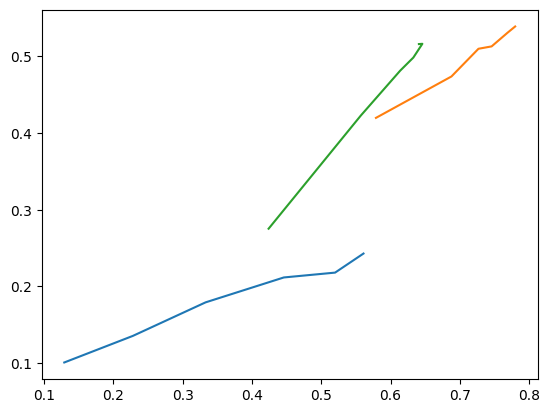

In [22]:
plt.plot((num_correct_gpt4o_all>25).mean(axis=1), test_accs_all1)
plt.plot((num_correct_gpt4o_all2>25).mean(axis=1), test_accs_all2)
plt.plot((num_correct_gpt4o_all3>25).mean(axis=1), test_accs_all3)


plt.savefig("delete.png")

Text(0.5, 1.0, 'gsm8k_orig_6epochs_full_lr0.0002_bs128')

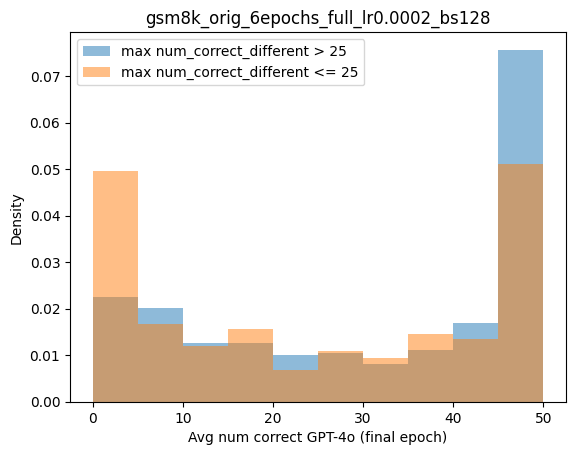

In [95]:
plt.hist(num_correct_gpt4o_all[-1][np.where(num_correct_different_all[:, :1000].max(axis=0) >25)[0]], density=True, alpha=0.5, label="max num_correct_different > 25")#, bins = np.arange(0, 7)-0.5)
plt.hist(num_correct_gpt4o_all[-1][np.where(num_correct_different_all[:, :1000].max(axis=0) <=25)[0]], density=True, alpha=0.5, label="max num_correct_different <= 25")#, bins = np.arange(0, 7)-0.5)

plt.xlabel("Avg num correct GPT-4o (final epoch)")
plt.ylabel("Density")
plt.legend()
plt.title(train_name)

Text(0.5, 1.0, 'Num decreasing: 0.153')

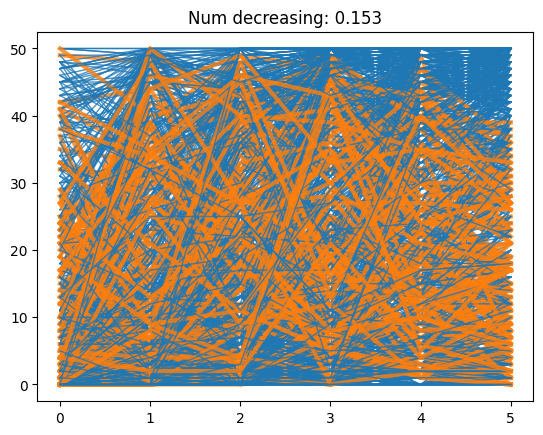

In [96]:
num_decreasing = 0
num_total = 1000
for i in range(num_total):
    
    if num_correct_gpt4o_all[-1, i] - num_correct_gpt4o_all[:, i].max()> -10:
        plt.plot(num_correct_gpt4o_all[:, i], alpha=0.8, color="C0", linewidth=1)
    else:
        plt.plot(num_correct_gpt4o_all[:, i], alpha=0.8, color="C1", linewidth=3)
        num_decreasing+=1
plt.title("Num decreasing: "+str(num_decreasing/num_total))

(array([  4.,   4.,   5.,  10.,  10.,  16.,  35.,  54.,  91., 771.]),
 array([-40., -36., -32., -28., -24., -20., -16., -12.,  -8.,  -4.,   0.]),
 <BarContainer object of 10 artists>)

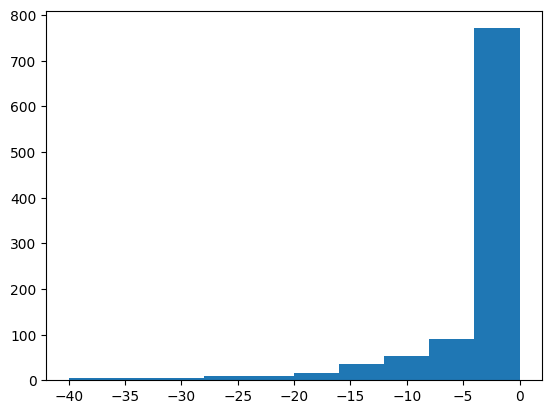

In [76]:
plt.hist(num_correct_gpt4o_all[-1, :] - num_correct_gpt4o_all.max(axis=0))

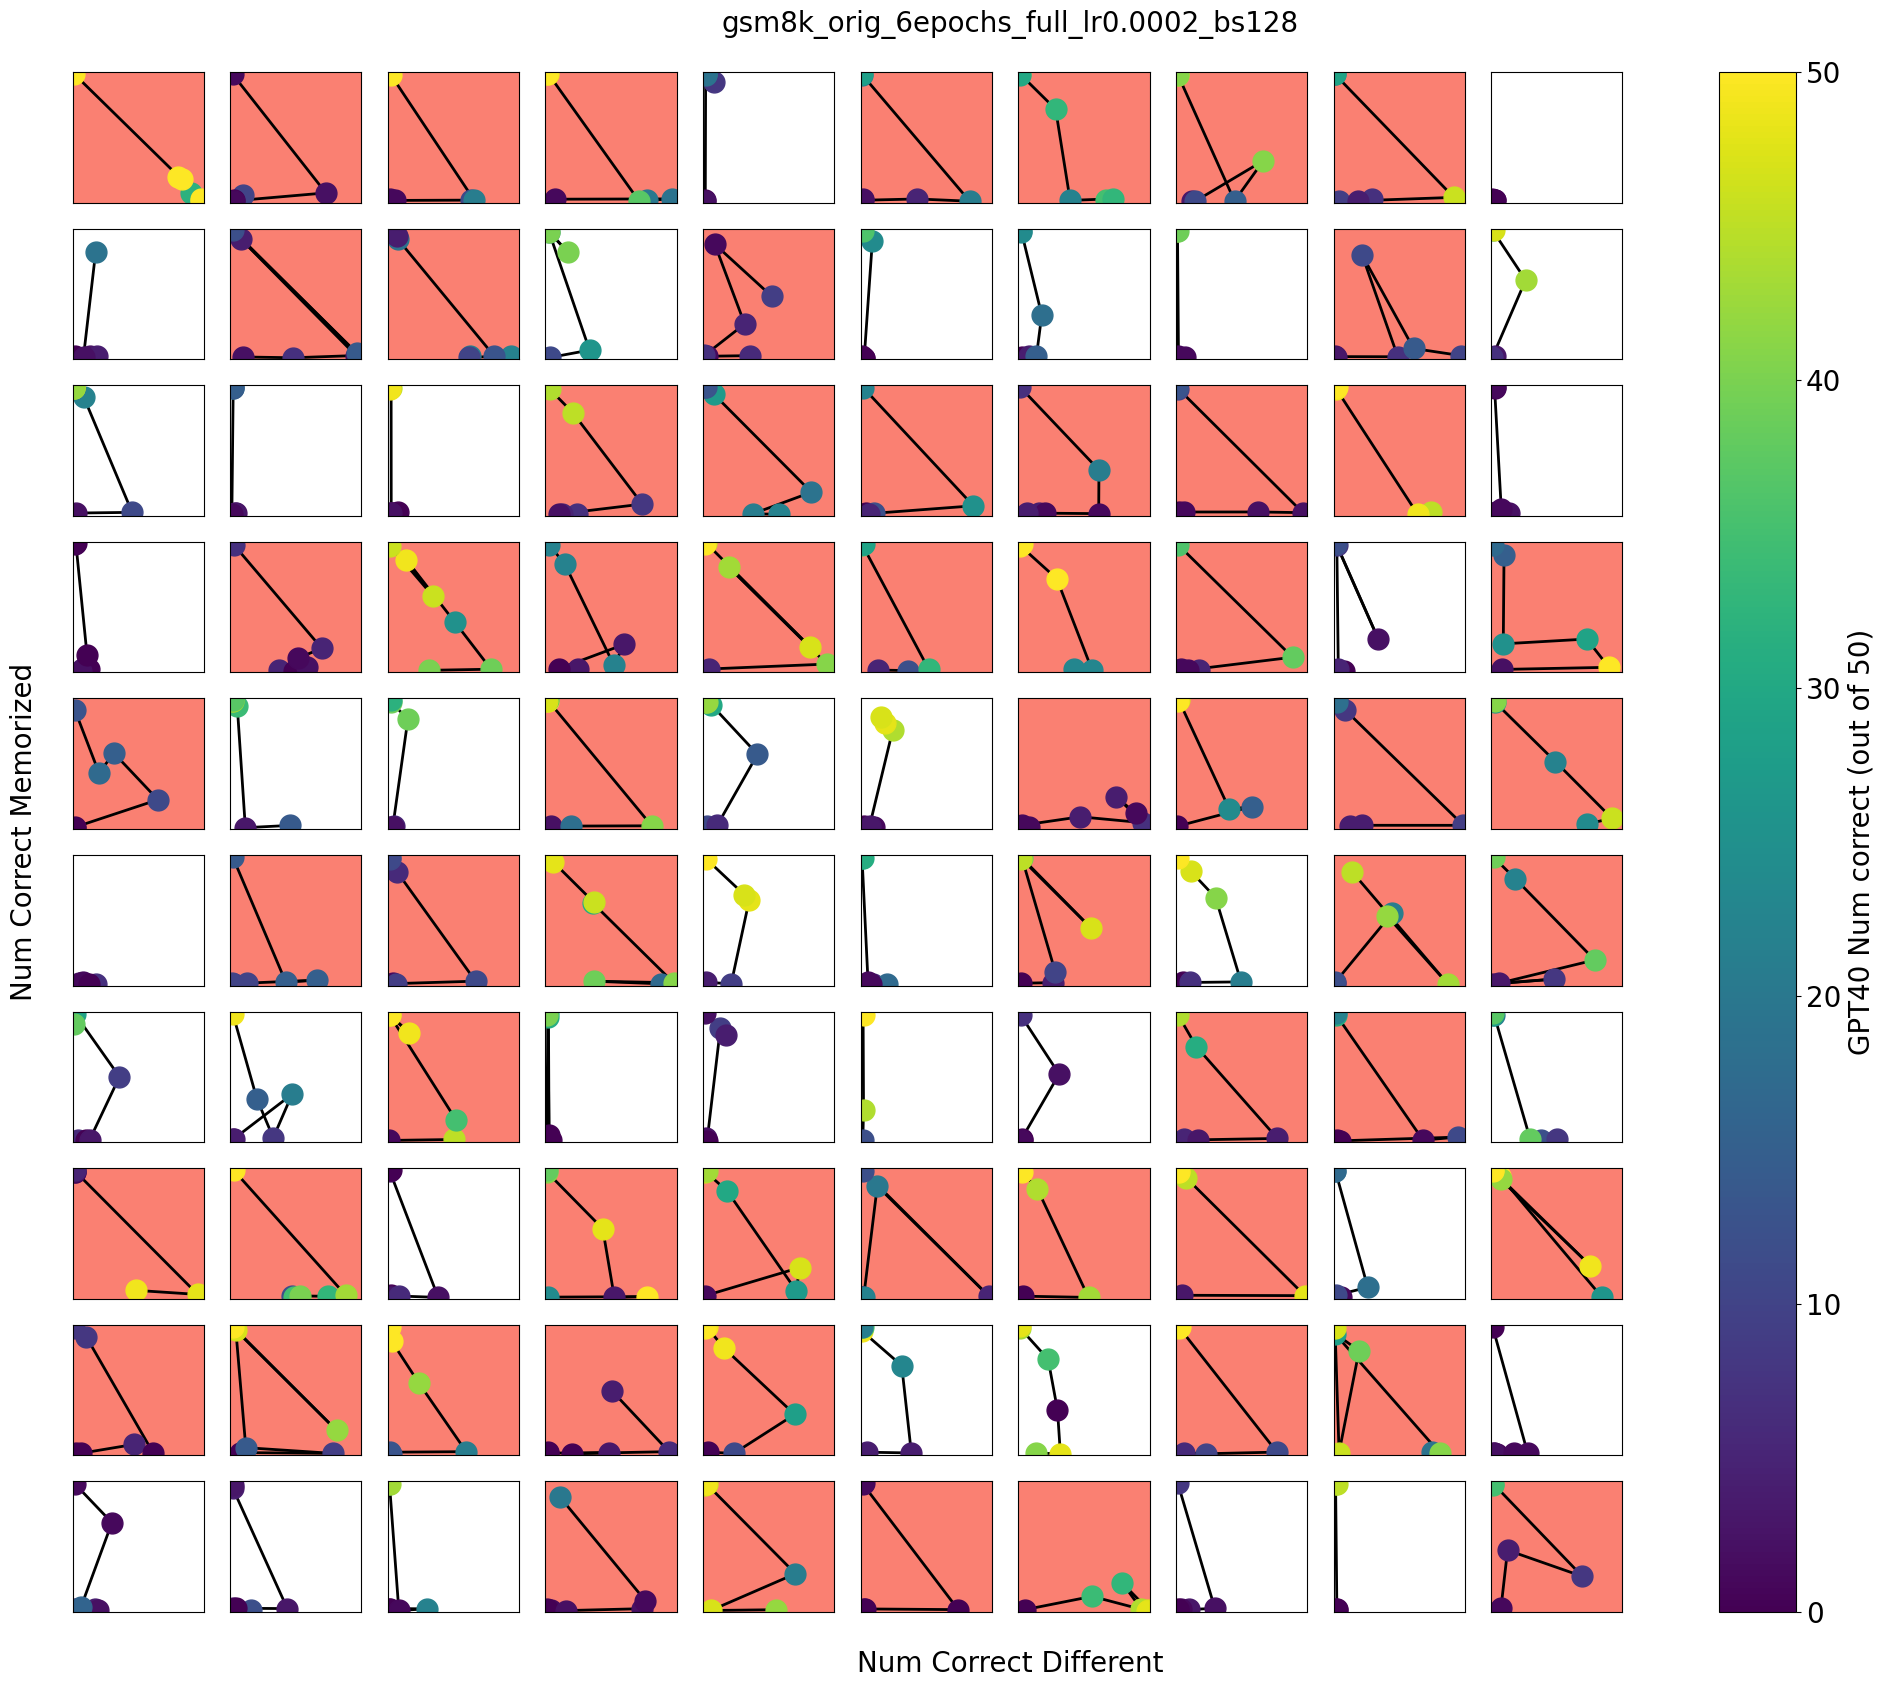

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap


# Create a gradient color map
cmap = plt.get_cmap('viridis')
# Create the plot
fig, ax = plt.subplots(10, 10, figsize=(25, 20))

# Create an array of values to use for coloring each segment
# color_values = np.linspace(1, 20, 6)




for i in range(100):
    
    num_epochs = 6
    x = num_correct_different_all[:num_epochs, i]+np.random.uniform(-0.5, 0.5, num_epochs)
    y = num_memorized_all[:num_epochs, i]+np.random.uniform(-0.5, 0.5, num_epochs)
    # Create line segments
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection from the segments
    lc = LineCollection(segments, norm=plt.Normalize(0, 50), alpha=1, color = "black")
    
    
    
    

    # lc.set_array(color_values)
    lc.set_linewidth(2)


    ax[i//10][i%10].add_collection(lc)
    ax[i//10][i%10].autoscale()
    color_values = num_correct_gpt4o_all[:, i]
    
    for j in range(6):
        ax[i//10][i%10].plot([x[j]], [y[j]], color=cmap(color_values[j]/50), marker='o', markersize=15)
        
    ax[i//10][i%10].set_xlim(-1, 51)
    ax[i//10][i%10].set_ylim(-1, 51)
    ax[i//10][i%10].set_yticks([])
    ax[i//10][i%10].set_xticks([])
    
    if max(x)>25:
        ax[i//10][i%10].set_facecolor('salmon')

# # Plot markers at the start of each segment
# ax.plot(x, y, 'o', color='black')

# Add a colorbar
cbar = plt.colorbar(lc, ax=ax)
cbar.ax.tick_params(labelsize=20) 

cbar.set_label('GPT40 Num correct (out of 50)', fontsize=20)

# add x label to entire plot

fig.text(0.5, 0.08, 'Num Correct Different', ha='center', fontsize=20)
fig.text(0.1, 0.5, 'Num Correct Memorized', va='center', rotation='vertical', fontsize=20)


# set title to entire figure

fig.text(0.5, 0.9, train_name, ha='center', fontsize=20)

plt.savefig("delete.png")